# Information Retriever: Building Blocks

## Env set up

In [0]:
!python3 --version

Python 3.12.3


I0000 00:00:1769155290.694370    3321 fork_posix.cc:71] Other threads are currently calling into gRPC, skipping fork() handlers


In [0]:
%pip install -U -qqq langgraph langgraph-prebuilt langgraph-sdk langgraph-checkpoint-sqlite langsmith langchain-community langchain-core langchain-openai notebook langchain-tavily wikipedia trustcall langgraph-cli[inmem] transformers

%pip install -U -qqq databricks-agents mlflow-skinny[databricks] databricks-langchain

%pip install -U -qqq databricks-sdk
dbutils.library.restartPython()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.20.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.19.5, but you have protobuf 6.33.4 which is incompatible.
grpcio-status 1.67.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.33.4 which is incompatible.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-health-checking 1.76.0 requires protobuf<7.0.0,>=6.31.1, but you have protobuf 5.29.5 which is incompatible.
grpcio-tools 1.75.1 requires protobuf<7.0.0,>=6.31.1, but you have protobuf 5.29.5 which is incompatible.
langgraph-a

In [0]:
## Variables containing the pointers to catalog, schema, lakebase

catalog_ = 'users'
schema_ = 'gabriele_albini'
lakebase_instance_ = 'shared-instance-size-4'

## Example data

In [0]:
## Creating a dataframe with examples of clients data
columns = ["customer_id", "name", "surname", "email", "address"]
examples_ = [
    (1, "Lena", "Schmidt", "lena.schmidt@example.com",
     "Alexanderplatz 5, 10178 Berlin, Germany"),
    (2, "Jonas", "Müller", "jonas.mueller@example.com",
     "221B Baker Street, NW1 6XE London, United Kingdom"),
    (3, "Sofia", "Rossi", "sofia.rossi@example.com",
     "Via Milano 11, 20126 Milano, Italy"),
    (4, "Marek", "Nowak", "marek.nowak@example.com",
     "ul. Marszałkowska 10, 00-590 Warsaw, Poland"),
    (5, "Hannah", "Dubois", "hannah.dubois@example.com",
     "12 Rue de la Paix, 75002 Paris, France"),
    (6, "David", "Nguyen", "david.nguyen@example.com",
     "Damrak 45, 1012 LL Amsterdam, Netherlands"),
    (7, "Amira", "Hassan", "amira.hassan@example.com",
     "Gran Vía 28, 28013 Madrid, Spain"),
    (8, "Felix", "Kovac", "felix.kovac@example.com",
     "Ringstrasse 3, 1010 Vienna, Austria"),
    (9, "Carla", "Lindberg", "carla.lindberg@example.com",
     "Sveavägen 15, 111 57 Stockholm, Sweden"),
    (10, "Tobias", "Nielsen", "tobias.nielsen@example.com",
     "Rådhuspladsen 1, 1550 Copenhagen, Denmark")
]

df_customer_example = spark.createDataFrame(examples_, columns)
display(df_customer_example)

customer_id,name,surname,email,address
1,Lena,Schmidt,lena.schmidt@example.com,"Alexanderplatz 5, 10178 Berlin, Germany"
2,Jonas,Müller,jonas.mueller@example.com,"221B Baker Street, NW1 6XE London, United Kingdom"
3,Sofia,Rossi,sofia.rossi@example.com,"Via Milano 11, 20126 Milano, Italy"
4,Marek,Nowak,marek.nowak@example.com,"ul. Marszałkowska 10, 00-590 Warsaw, Poland"
5,Hannah,Dubois,hannah.dubois@example.com,"12 Rue de la Paix, 75002 Paris, France"
6,David,Nguyen,david.nguyen@example.com,"Damrak 45, 1012 LL Amsterdam, Netherlands"
7,Amira,Hassan,amira.hassan@example.com,"Gran Vía 28, 28013 Madrid, Spain"
8,Felix,Kovac,felix.kovac@example.com,"Ringstrasse 3, 1010 Vienna, Austria"
9,Carla,Lindberg,carla.lindberg@example.com,"Sveavägen 15, 111 57 Stockholm, Sweden"
10,Tobias,Nielsen,tobias.nielsen@example.com,"Rådhuspladsen 1, 1550 Copenhagen, Denmark"


In [0]:
## Creating a dataframe with examples of order data
order_columns = ["Order_ID", "date", "cart", "amount", "customer_id"]
examples_ = [
    ("ID-45892171", "2025-11-02",
     ["Office Chair", "Standing Desk", "Desk Lamp"],
     1299.90, 1),

    ("ID-45892172", "2025-11-03",
     ["Mechanical Keyboard", "Wireless Mouse", "Mouse Pad"],
     189.50, 2),

    ("ID-45892173", "2025-11-05",
     ["A4 Paper (500 sheets)", "Stapler", "Staples Pack", "Highlighters Set"],
     64.30, 3),

    ("ID-45892174", "2025-11-06",
     ["Whiteboard", "Whiteboard Markers Set", "Eraser"],
     215.00, 4),

    ("ID-45892175", "2025-11-08",
     ["Desk Organizer", "Notebooks Pack", "Ballpoint Pens (20x)"],
     72.40, 5),

    ("ID-45892176", "2025-11-09",
     ["Monitor 27\"", "HDMI Cable", "Monitor Arm"],
     459.99, 6),

    ("ID-45892177", "2025-11-10",
     ["Office Chair", "Footrest"],
     389.00, 7),

    ("ID-45892178", "2025-11-11",
     ["Laser Printer", "Printer Paper (1000 sheets)"],
     329.50, 8),

    ("ID-45892179", "2025-11-12",
     ["Inkjet Printer Cartridges Set", "Label Printer"],
     248.75, 9),

    ("ID-45892180", "2025-11-13",
     ["Conference Speakerphone", "Webcam HD"],
     312.20, 10),

    ("ID-45892181", "2025-11-14",
     ["Filing Cabinet", "Hanging Folders (25x)"],
     410.00, 1),

    ("ID-45892182", "2025-11-15",
     ["Desk Lamp", "LED Bulbs (4x)", "Cable Management Kit"],
     98.60, 2),

    ("ID-45892183", "2025-11-16",
     ["Mouse Pad", "Ergonomic Wrist Rest"],
     42.30, 3),

    ("ID-45892184", "2025-11-18",
     ["A4 Paper (500 sheets)", "Sticky Notes Pack", "Markers Set"],
     53.10, 4),

    ("ID-45892185", "2025-11-19",
     ["Flipchart", "Flipchart Paper (3x)", "Markers Set"],
     187.40, 5),

    ("ID-45892186", "2025-11-20",
     ["Network Switch 8-port", "Ethernet Cables (5x)"],
     224.80, 6),

    ("ID-45892187", "2025-11-21",
     ["External SSD 1TB", "USB Hub"],
     189.99, 7),

    ("ID-45892188", "2025-11-22",
     ["Office Headset", "Laptop Stand"],
     154.60, 8),

    ("ID-45892189", "2025-11-23",
     ["Desk Organizer", "Pen Holder", "Document Tray"],
     61.25, 9),

    ("ID-45892190", "2025-11-24",
     ["Monitor 24\"", "DisplayPort Cable"],
     269.90, 10),

    ("ID-45892191", "2025-11-25",
     ["Whiteboard Markers Set", "Cleaning Spray", "Microfiber Cloths"],
     39.80, 1),

    ("ID-45892192", "2025-11-26",
     ["Notebooks Pack", "Ballpoint Pens (50x)", "Highlighters Set"],
     88.15, 2),

    ("ID-45892193", "2025-11-27",
     ["Office Chair", "Seat Cushion"],
     345.00, 3),

    ("ID-45892194", "2025-11-28",
     ["Paper Shredder", "Trash Bags (Office)"],
     219.50, 4),

    ("ID-45892195", "2025-11-29",
     ["Laminator", "Laminating Pouches (100x)"],
     132.40, 5)
]

df_order_example = spark.createDataFrame(examples_, order_columns)
display(df_order_example)

Order_ID,date,cart,amount,customer_id
ID-45892171,2025-11-02,"List(Office Chair, Standing Desk, Desk Lamp)",1299.9,1
ID-45892172,2025-11-03,"List(Mechanical Keyboard, Wireless Mouse, Mouse Pad)",189.5,2
ID-45892173,2025-11-05,"List(A4 Paper (500 sheets), Stapler, Staples Pack, Highlighters Set)",64.3,3
ID-45892174,2025-11-06,"List(Whiteboard, Whiteboard Markers Set, Eraser)",215.0,4
ID-45892175,2025-11-08,"List(Desk Organizer, Notebooks Pack, Ballpoint Pens (20x))",72.4,5
ID-45892176,2025-11-09,"List(Monitor 27"", HDMI Cable, Monitor Arm)",459.99,6
ID-45892177,2025-11-10,"List(Office Chair, Footrest)",389.0,7
ID-45892178,2025-11-11,"List(Laser Printer, Printer Paper (1000 sheets))",329.5,8
ID-45892179,2025-11-12,"List(Inkjet Printer Cartridges Set, Label Printer)",248.75,9
ID-45892180,2025-11-13,"List(Conference Speakerphone, Webcam HD)",312.2,10


In [0]:
## Create some retrieval requests
columns = ["id", "sender_email", "email_body"]
examples_ = [
  (1, "sofia.rossi@example.com", "Dear sir or madam, I would like to get my residence address updated to: v. bella 1, Milano (MI), Italia"),

  (2, "lena.schmidt@example.com", "Hello, I'd like to get an updated delivery date for shipment ID-45892171, given that I didn't receive it yet. Thank you"),

  (3, "roberta.verdi@example.com", "Understood, I will wait a couple of days thanks"),

  (4, "roberta.verdi@example.com", "Can you provide an update on the refund related to order ID-99999999?")
]
df_example = spark.createDataFrame(examples_, columns)
display(df_example)

id,sender_email,email_body
1,sofia.rossi@example.com,"Dear sir or madam, I would like to get my residence address updated to: v. bella 1, Milano (MI), Italia"
2,lena.schmidt@example.com,"Hello, I'd like to get an updated delivery date for shipment ID-45892171, given that I didn't receive it yet. Thank you"
3,roberta.verdi@example.com,"Understood, I will wait a couple of days thanks"
4,roberta.verdi@example.com,Can you provide an update on the refund related to order ID-99999999?


## Persist Data
Execute this section only when the data needs to be recreated.

Sync delta tables to Lakebase ([doc](https://docs.databricks.com/aws/en/oltp/instances/sync-data/sync-table?language=Python+SDK))

In [0]:
regenerate_data = False

In [0]:
## Generate delta tables
if regenerate_data:
  spark.sql("CREATE CATALOG IF NOT EXISTS "+catalog_)
  spark.sql("USE CATALOG "+catalog_)
  spark.sql("CREATE SCHEMA IF NOT EXISTS "+schema_)
  spark.sql("USE SCHEMA "+schema_)
  spark.sql("DROP TABLE IF EXISTS classificator_agent_customers")
  spark.sql("DROP TABLE IF EXISTS classificator_agent_orders")
  df_customer_example.write.mode("overwrite").saveAsTable("classificator_agent_customers")
  spark.sql(
  """
    ALTER TABLE classificator_agent_customers ALTER COLUMN customer_id SET NOT NULL
  """)
  spark.sql(
  """
    ALTER TABLE classificator_agent_customers ADD CONSTRAINT customers_pk PRIMARY KEY (customer_id)
  """)
  df_order_example.write.mode("overwrite").saveAsTable("classificator_agent_orders")
  spark.sql(
  """
    ALTER TABLE classificator_agent_orders ALTER COLUMN Order_ID SET NOT NULL
  """)
  spark.sql(
  """
    ALTER TABLE classificator_agent_orders ADD CONSTRAINT orders_pk PRIMARY KEY (Order_ID)
  """)

else:
  spark.sql("USE CATALOG "+catalog_)
  spark.sql("USE SCHEMA "+schema_)

In [0]:
## Sync Delta tables with Lakebase Instance: Customers

from databricks.sdk import WorkspaceClient
from databricks.sdk.service.database import DatabaseInstance
from databricks.sdk.service.database import SyncedDatabaseTable, SyncedTableSpec, NewPipelineSpec, SyncedTableSchedulingPolicy
w = WorkspaceClient()

if regenerate_data:    

    # Create a synced table in a standard UC catalog
    synced_table = w.database.create_synced_database_table(
        SyncedDatabaseTable(
            name=catalog_+"."+schema_+".classificator_agent_customers_synced",  # Full three-part name
            database_instance_name=lakebase_instance_,  # Required for standard catalogs
            logical_database_name="databricks_postgres",  # Required for standard catalogs
            spec=SyncedTableSpec(
                source_table_full_name=catalog_+"."+schema_+".classificator_agent_customers",
                primary_key_columns=["customer_id"],
                scheduling_policy=SyncedTableSchedulingPolicy.SNAPSHOT,
                create_database_objects_if_missing=True,  # Create database/schema if needed
                new_pipeline_spec=NewPipelineSpec(
                    storage_catalog=catalog_,
                    storage_schema=schema_
                )
            ),
        )
    )
    print(f"Created synced table: {synced_table.name}")

    synced_table_name = catalog_+"."+schema_+".classificator_agent_customers_synced"
    status = w.database.get_synced_database_table(name=synced_table_name)
    print(f"Synced table status: {status.data_synchronization_status.detailed_state}")
    print(f"Status message: {status.data_synchronization_status.message}")

# Check the status of a synced table
synced_table_name = catalog_+"."+schema_+".classificator_agent_customers_synced"
status = w.database.get_synced_database_table(name=synced_table_name)
print(status)

SyncedDatabaseTable(name='users.gabriele_albini.classificator_agent_customers_synced', data_synchronization_status=SyncedTableStatus(continuous_update_status=None, detailed_state=<SyncedTableState.SYNCED_TABLE_ONLINE_NO_PENDING_UPDATE: 'SYNCED_TABLE_ONLINE_NO_PENDING_UPDATE'>, failed_status=None, last_sync=SyncedTablePosition(delta_table_sync_info=DeltaTableSyncInfo(delta_commit_timestamp='2026-01-18T18:21:47Z', delta_commit_version=1), sync_end_timestamp='2026-01-18T18:23:50.996758Z', sync_start_timestamp='2026-01-18T18:23:45.215568Z'), message='Online Table creation succeeded using Delta Live Tables: https://e2-demo-field-eng.cloud.databricks.com#joblist/pipelines/e3c3ef69-822a-4155-b34e-d7a9291f45c6/updates/5a2e36f8-7a6b-410c-bd7c-f9359e51d549.', pipeline_id='e3c3ef69-822a-4155-b34e-d7a9291f45c6', provisioning_status=None, triggered_update_status=SyncedTableTriggeredUpdateStatus(last_processed_commit_version=1, timestamp='2026-01-18T18:23:50Z', triggered_update_progress=None)), data

In [0]:
## Sync Delta tables with Lakebase Instance: Orders

from databricks.sdk import WorkspaceClient
from databricks.sdk.service.database import DatabaseInstance
from databricks.sdk.service.database import SyncedDatabaseTable, SyncedTableSpec, NewPipelineSpec, SyncedTableSchedulingPolicy
w = WorkspaceClient()

if regenerate_data:    

    # Create a synced table in a standard UC catalog
    synced_table = w.database.create_synced_database_table(
        SyncedDatabaseTable(
            name=catalog_+"."+schema_+".classificator_agent_orders_synced",  # Full three-part name
            database_instance_name=lakebase_instance_,  # Required for standard catalogs
            logical_database_name="databricks_postgres",  # Required for standard catalogs
            spec=SyncedTableSpec(
                source_table_full_name=catalog_+"."+schema_+".classificator_agent_orders",
                primary_key_columns=["Order_ID"],
                scheduling_policy=SyncedTableSchedulingPolicy.SNAPSHOT,
                create_database_objects_if_missing=True,  # Create database/schema if needed
                new_pipeline_spec=NewPipelineSpec(
                    storage_catalog=catalog_,
                    storage_schema=schema_
                )
            ),
        )
    )
    print(f"Created synced table: {synced_table.name}")

    synced_table_name = catalog_+"."+schema_+".classificator_agent_orders_synced"
    status = w.database.get_synced_database_table(name=synced_table_name)
    print(f"Synced table status: {status.data_synchronization_status.detailed_state}")
    print(f"Status message: {status.data_synchronization_status.message}")

# Check the status of a synced table
synced_table_name = catalog_+"."+schema_+".classificator_agent_orders_synced"
status = w.database.get_synced_database_table(name=synced_table_name)
print(status)

SyncedDatabaseTable(name='users.gabriele_albini.classificator_agent_orders_synced', data_synchronization_status=SyncedTableStatus(continuous_update_status=None, detailed_state=<SyncedTableState.SYNCED_TABLE_ONLINE_NO_PENDING_UPDATE: 'SYNCED_TABLE_ONLINE_NO_PENDING_UPDATE'>, failed_status=None, last_sync=SyncedTablePosition(delta_table_sync_info=DeltaTableSyncInfo(delta_commit_timestamp='2026-01-18T18:21:50Z', delta_commit_version=1), sync_end_timestamp='2026-01-18T18:29:01.810806Z', sync_start_timestamp='2026-01-18T18:28:55.792178Z'), message='Online Table creation succeeded using Delta Live Tables: https://e2-demo-field-eng.cloud.databricks.com#joblist/pipelines/19d15079-b671-4589-868a-d133c57879a9/updates/b9cab05e-f096-4edf-a5d1-37d76c78adf9.', pipeline_id='19d15079-b671-4589-868a-d133c57879a9', provisioning_status=None, triggered_update_status=SyncedTableTriggeredUpdateStatus(last_processed_commit_version=1, timestamp='2026-01-18T18:29:01Z', triggered_update_progress=None)), databas

## Create the Retriever functions

Create UC functions that can be used as retriever tools by the agent ([doc](https://docs.databricks.com/aws/en/generative-ai/agent-framework/structured-retrieval-tools), Databricks Demos [example in Notebook 5.1](https://notebooks.databricks.com/demos/lakehouse-iot-platform/index.html#))

In [0]:
spark.sql("USE CATALOG "+catalog_)
spark.sql("USE SCHEMA "+schema_)

DataFrame[]

In [0]:
%sql
DROP FUNCTION IF EXISTS classificator_agent_customer_retriever;
DROP FUNCTION IF EXISTS classificator_agent_order_retriever;

CREATE OR REPLACE FUNCTION classificator_agent_customer_retriever(customer_email STRING)
RETURNS STRUCT<customer_id BIGINT, name STRING, surname STRING, email STRING, address STRING>
LANGUAGE SQL
COMMENT 'Returns customer details based on the customer email address'
RETURN (
  SELECT struct(customer_id, name, surname, email, address)
  FROM classificator_agent_customers_synced
  WHERE email = classificator_agent_customer_retriever.customer_email
  LIMIT 1
);

CREATE OR REPLACE FUNCTION classificator_agent_order_retriever(customer_order_id STRING)
RETURNS STRUCT<Order_ID STRING, date STRING, cart STRING, amount DOUBLE, customer_id BIGINT>
LANGUAGE SQL
COMMENT 'Returns order details based on the order ID'
RETURN (
  SELECT struct(Order_ID, date, cart, amount, customer_id)
  FROM classificator_agent_orders_synced
  WHERE Order_ID = classificator_agent_order_retriever.customer_order_id
  LIMIT 1
);

In [0]:
%sql
SELECT classificator_agent_customer_retriever('jonas.mueller@example.com') AS customer_details;

customer_details
"List(2, Jonas, Müller, jonas.mueller@example.com, 221B Baker Street, NW1 6XE London, United Kingdom)"


In [0]:
%sql
SELECT classificator_agent_order_retriever('ID-45892178') AS Order_Details;

Order_Details
"List(ID-45892178, 2025-11-11, [""Laser Printer"", ""Printer Paper (1000 sheets)""], 329.5, 8)"


## Create a ReAct tool calling retriever agent

In [0]:
## LLM Set up: Variable containing the LLM Endpoint to use
llm_endpoint = 'databricks-gpt-5-1'
llm_endpoint = 'databricks-claude-sonnet-4-5'

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Graph State
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages, AnyMessage
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

## Set up the agent state to concatenate messages in memory
class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    customer_context: str
    order_context: str

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Base LLM
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
from databricks_langchain import ChatDatabricks
model = ChatDatabricks(endpoint = llm_endpoint, temperature=0) 

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
Unexpected internal error when monkey patching `PreTrainedModel.from_pretrained`: 
PreTrainedModel requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.

Unexpected internal error when monkey patching `Trainer.train`: 
Trainer requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.



In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# UC functions as Tools
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
from databricks_langchain import UCFunctionToolkit

toolkit = UCFunctionToolkit(function_names=[
      f"{catalog_}.{schema_}.classificator_agent_customer_retriever",
      f"{catalog_}.{schema_}.classificator_agent_order_retriever",
])
tools = toolkit.tools

/local_disk0/.ephemeral_nfs/envs/pythonEnv-825fdd92-bc12-41dc-93a0-6d094894a02c/lib/python3.12/site-packages/databricks/connect/session.py:476: UserWarning: Ignoring the default notebook Spark session and creating a new Spark Connect session. To use the default notebook Spark session, use DatabricksSession.builder.getOrCreate() with no additional parameters.
  warnings.warn(new_notebook_session_msg)


In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Create Tool Binding
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
model_with_tools = model.bind_tools(tools)

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Reasoning Node (Assistant)
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 

from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="""
    You are a customer support assistant, tasked with providing more context to incoming customer communications, such as emmails.\n
    Use the available tools to perform information retrieval.\n
    If you don't have the required information to use a tool, DO NOT use it and assume that content cannot be retrieved.\n
    If a tool you've invoked returns null or an error, also assume that content cannot be retrieved.\n
    Once you've retrieved all the available information, provide a summary of the information and STOP.""")

# Reasoning Node
def assistant(state: AgentState):
  result = model_with_tools.invoke([sys_msg] + state["messages"])
  return {"messages": [result]}

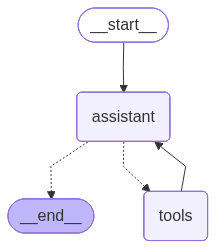

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# ReAct Graph
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 

from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition # Check if the model's output is a tool call
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(AgentState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_retriever = builder.compile()  # No memory needed

# Display the Graph
display(Image(react_retriever.get_graph().draw_mermaid_png()))

In [0]:
## Testing
from pyspark.sql.functions import *
from langchain_core.messages import HumanMessage
import mlflow

# Extract test case from the dataframe with examples
id_ = 4
config_ = {"configurable": {"thread_id": str(id_)}}
example_row = df_example.filter(col("ID") == id_).first()
message_ = f"We received from: {example_row.sender_email} the following email: {example_row.email_body}"

# Invoke the Agent
mlflow.langchain.autolog()
with mlflow.start_run(run_name="React Agent Retriever Test"):
  request = [
    HumanMessage(content = message_)
  ]
  messages = react_retriever.invoke({"messages": request}, config_)

  for m in messages['messages']:
      m.pretty_print()

================================ Human Message =================================

We received from: roberta.verdi@example.com the following email: Can you provide an update on the refund related to order ID-99999999?
================================== Ai Message ==================================

I'll retrieve information about the customer and the order to provide context for this email.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01HqKgaEFAc7kjj7yQBVK3Hg)
 Call ID: toolu_bdrk_01HqKgaEFAc7kjj7yQBVK3Hg
  Args:
    customer_email: roberta.verdi@example.com
  users__gabriele_albini__classificator_agent_order_retriever (toolu_bdrk_01Q9FJ18KmkrJTsg85n4PPi1)
 Call ID: toolu_bdrk_01Q9FJ18KmkrJTsg85n4PPi1
  Args:
    customer_order_id: ID-99999999
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "None"}
==============

Trace(trace_id=tr-e689575ae500085f34a4539f9342cd66)

## v2: Create a ReAct tool calling retriever agent with Output schema

Adding a respond node to the above schema, to format the reply in a desired Output.

In [0]:
## LLM Set up: Variable containing the LLM Endpoint to use
llm_endpoint = 'databricks-gpt-5-1'
llm_endpoint = 'databricks-claude-sonnet-4-5'

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Output Schema
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 

from pydantic import BaseModel, Field
from typing import Literal

class RetrievedInfoOutput(BaseModel):
  Customer_Email: str = Field(description = "Email of the customer who sent the message.")
  Customer_Id: str = Field(description = "Id of the customer, related to the email. If not found, return NULL.")
  Order_Id: str = Field(description = "Id of the order found in the system, if mentioned in the customer's email. If the customer didn't mention any order or the Id was not found, return NULL.")
  Customer_Details: str = Field(description = "Retrieved customer information. If not found, return NULL.")
  Order_Details: str = Field(description = "Retrieved order information. If not found, return NULL.")

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Graph State
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages, AnyMessage
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

## Set up the agent state to concatenate messages in memory
class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    final_response: RetrievedInfoOutput | None

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Base LLM
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
from databricks_langchain import ChatDatabricks
model = ChatDatabricks(endpoint = llm_endpoint, temperature=0) 

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# UC functions as Tools
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
from databricks_langchain import UCFunctionToolkit

toolkit = UCFunctionToolkit(function_names=[
      f"{catalog_}.{schema_}.classificator_agent_customer_retriever",
      f"{catalog_}.{schema_}.classificator_agent_order_retriever",
])
tools = toolkit.tools

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Create Tool Binding
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
model_with_tools = model.bind_tools(tools)

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Create Respond Model (LLM + Output schema)
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
model_with_output_schema = model.with_structured_output(RetrievedInfoOutput)

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Reasoning Node (Assistant)
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 

from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="""
    You are a customer support assistant, tasked with providing more context to incoming customer communications, such as emmails.\n
    Use the available tools to perform information retrieval.\n
    If you don't have the required information to use a tool, DO NOT use it and assume that content cannot be retrieved.\n
    If a tool you've invoked returns null or an error, also assume that content cannot be retrieved.\n
    Once you've retrieved all the available information, proceed.""")

# Reasoning Node
def assistant(state: AgentState) -> AgentState:
  result = model_with_tools.invoke([sys_msg] + state["messages"])
  return {"messages": state["messages"] + [result]}

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# Respond Node: enforce schema on final answer
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 

def respond_node(state: AgentState) -> AgentState:
    # Using the last tool message as input to structured output model
    last_msg = state["messages"][-1]
    result = model_with_output_schema.invoke(
        [HumanMessage(content=last_msg.content)]
    )
    return {"final_response": result}

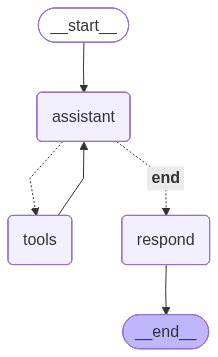

In [0]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 
# ReAct Graph
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### 

from langgraph.graph import START, StateGraph, END
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(AgentState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))
builder.add_node("respond", respond_node)

# Define the conditional edge: if there is a tool call, route to tools, else to the respond node

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
    {"tools": "tools", "__end__": "respond"} # customize mapping which routes to end by default
)
builder.add_edge("tools", "assistant") # ReAct: return tools output to assistant!
builder.add_edge("respond", END)
react_retriever_with_output = builder.compile() # No memory needed

# Display the Graph
display(Image(react_retriever_with_output.get_graph().draw_mermaid_png()))

In [0]:
## Testing
from pyspark.sql.functions import *
from langchain_core.messages import HumanMessage
import mlflow

# Extract test case from the dataframe with examples
id_ = 2
config_ = {"configurable": {"thread_id": str(id_)}}
example_row = df_example.filter(col("ID") == id_).first()
message_ = f"We received from: {example_row.sender_email} the following email: {example_row.email_body}"

# Invoke the Agent
mlflow.langchain.autolog()
with mlflow.start_run(run_name="React Agent Retriever with Output schema Test"):
  request = [
    HumanMessage(content = message_)
  ]
  messages = react_retriever_with_output.invoke({"messages": request}, config_)

  for m in messages['messages']:
      m.pretty_print()

/local_disk0/.ephemeral_nfs/envs/pythonEnv-825fdd92-bc12-41dc-93a0-6d094894a02c/lib/python3.12/site-packages/unitycatalog/ai/core/databricks.py:600: UserWarning: The following parameters do not have descriptions: customer_email for the function users.gabriele_albini.classificator_agent_customer_retriever. Using Unity Catalog functions that do not have parameter descriptions limits the functionality for an LLM to understand how to call your function. To improve tool calling accuracy, provide verbose parameter descriptions that fully explain what the expected usage of the function arguments are.
  check_function_info(function_info)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-825fdd92-bc12-41dc-93a0-6d094894a02c/lib/python3.12/site-packages/unitycatalog/ai/core/databricks.py:600: UserWarning: The following parameters do not have descriptions: customer_order_id for the function users.gabriele_albini.classificator_agent_order_retriever. Using Unity Catalog functions that do not have paramete

================================ Human Message =================================

We received from: lena.schmidt@example.com the following email: Hello, I'd like to get an updated delivery date for shipment ID-45892171, given that I didn't receive it yet. Thank you
================================== Ai Message ==================================

I'll help you gather context about this customer inquiry. Let me retrieve information about the customer and their order.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_014cLk32dZTkxigi9A1wJVfU)
 Call ID: toolu_bdrk_014cLk32dZTkxigi9A1wJVfU
  Args:
    customer_email: lena.schmidt@example.com
  users__gabriele_albini__classificator_agent_order_retriever (toolu_bdrk_01NzByBKisQ2tNnjDSTCPcY4)
 Call ID: toolu_bdrk_01NzByBKisQ2tNnjDSTCPcY4
  Args:
    customer_order_id: ID-45892171
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_ag

Trace(trace_id=tr-0dee452e6e6859d3b430fb34c4838c03)